In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('daily_data.csv')

In [24]:
# net profit /loss
df['temp'] = (df['close'] - df['open'])
df

,datetime,high,low,close,open,volume,temp
0,01-01-2018,13818.55,12750.00,13135.00,13715.65,6970.441076,-580.65
1,02-01-2018,14750.00,12890.02,14580.00,13135.00,16359.347340,1445.00
2,03-01-2018,15473.49,14150.00,14749.97,14576.87,19457.238600,173.10
3,04-01-2018,15280.00,13918.04,14811.00,14710.00,18783.876560,101.00
4,05-01-2018,17118.13,14600.00,16579.00,14805.01,22383.657330,1773.99
...,...,...,...,...,...,...,...
1468,08-01-2022,42246.37,40501.00,40679.82,41707.04,27031.900870,-1027.22
1469,09-01-2022,42300.00,40520.00,41966.99,40679.82,27291.009660,1287.17
1470,10-01-2022,42786.70,39650.00,41604.58,41966.99,51064.904360,-362.41
1471,11-01-2022,43100.00,41158.99,42755.00,41604.58,38062.818280,1150.42


In [25]:
#DR=%profit/loss
df['DR'] = ((df['close'] - df['open']) / df['open']) * 100
df['open/close']=df['open']/df['close']
df['low/high']=df['low']/df['high']
df


,datetime,high,low,close,open,volume,temp,DR,open/close,low/high
0,01-01-2018,13818.55,12750.00,13135.00,13715.65,6970.441076,-580.65,-4.233485,1.044206,0.922673
1,02-01-2018,14750.00,12890.02,14580.00,13135.00,16359.347340,1445.00,11.001142,0.900892,0.873900
2,03-01-2018,15473.49,14150.00,14749.97,14576.87,19457.238600,173.10,1.187498,0.988264,0.914467
3,04-01-2018,15280.00,13918.04,14811.00,14710.00,18783.876560,101.00,0.686608,0.993181,0.910866
4,05-01-2018,17118.13,14600.00,16579.00,14805.01,22383.657330,1773.99,11.982363,0.892998,0.852897
...,...,...,...,...,...,...,...,...,...,...
1468,08-01-2022,42246.37,40501.00,40679.82,41707.04,27031.900870,-1027.22,-2.462942,1.025251,0.958686
1469,09-01-2022,42300.00,40520.00,41966.99,40679.82,27291.009660,1287.17,3.164149,0.969329,0.957920
1470,10-01-2022,42786.70,39650.00,41604.58,41966.99,51064.904360,-362.41,-0.863560,1.008711,0.926690
1471,11-01-2022,43100.00,41158.99,42755.00,41604.58,38062.818280,1150.42,2.765128,0.973093,0.954965


In [26]:
#sharpe ratio is (daily return - riskfreerate)'s mean divided by its std
sharpe_ratios = []

# Loop to calculate Sharpe ratio for each day
for i in range(len(df)):
    subset_data = df.iloc[:i+1] #starting se ith row tak

    mean_dr = subset_data['DR'].mean() #subset table's DR's ka mean
    std_dr = subset_data['DR'].std(ddof=0)  # their standard deviation

    # Calculate the Sharpe ratio
    sharpe_ratio = (mean_dr - 4.23)/std_dr
    sharpe_ratios.append(sharpe_ratio)


# Adding the Sharpe ratios list to the table
df['Sharpe Ratios'] = sharpe_ratios
df

<ipython-input-26-b2d3a243ee96>:12: RuntimeWarning: divide by zero encountered in double_scalars
  sharpe_ratio = (mean_dr - 4.23)/std_dr


,datetime,high,low,close,open,volume,temp,DR,open/close,low/high,Sharpe Ratios
0,01-01-2018,13818.55,12750.00,13135.00,13715.65,6970.441076,-580.65,-4.233485,1.044206,0.922673,-inf
1,02-01-2018,14750.00,12890.02,14580.00,13135.00,16359.347340,1445.00,11.001142,0.900892,0.873900,-0.111085
2,03-01-2018,15473.49,14150.00,14749.97,14576.87,19457.238600,173.10,1.187498,0.988264,0.914467,-0.250318
3,04-01-2018,15280.00,13918.04,14811.00,14710.00,18783.876560,101.00,0.686608,0.993181,0.910866,-0.374494
4,05-01-2018,17118.13,14600.00,16579.00,14805.01,22383.657330,1773.99,11.982363,0.892998,0.852897,-0.016657
...,...,...,...,...,...,...,...,...,...,...,...
1468,08-01-2022,42246.37,40501.00,40679.82,41707.04,27031.900870,-1027.22,-2.462942,1.025251,0.958686,-1.000576
1469,09-01-2022,42300.00,40520.00,41966.99,40679.82,27291.009660,1287.17,3.164149,0.969329,0.957920,-1.000228
1470,10-01-2022,42786.70,39650.00,41604.58,41966.99,51064.904360,-362.41,-0.863560,1.008711,0.926690,-1.000717
1471,11-01-2022,43100.00,41158.99,42755.00,41604.58,38062.818280,1150.42,2.765128,0.973093,0.954965,-1.000483


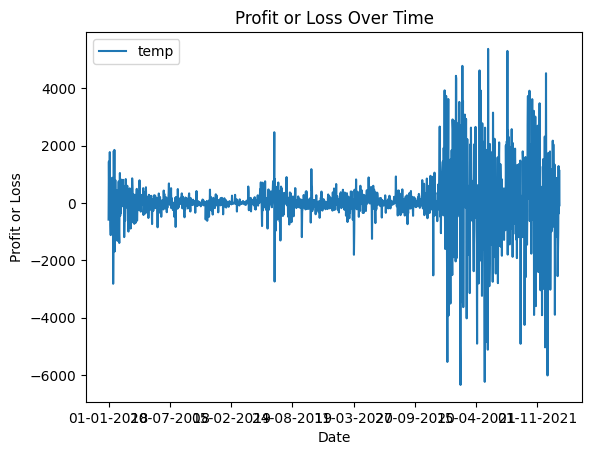

In [27]:
#net profit/loss ka graph

df.plot(x='datetime',
        y='temp')
plt.title('Profit or Loss Over Time')
plt.xlabel('Date')
plt.ylabel('Profit or Loss')
plt.show()

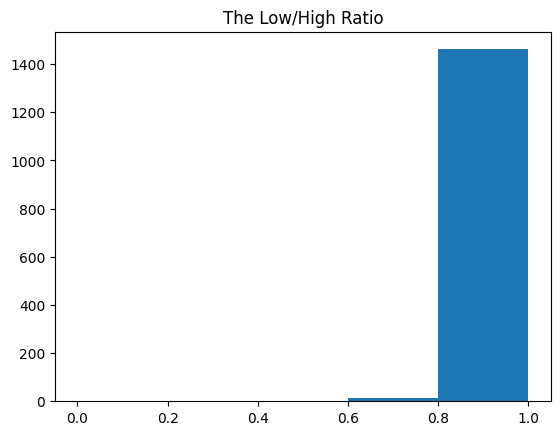

In [28]:
#sorting low/high ratio
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
plt.hist(df['low/high'], bins)
plt.title('The Low/High Ratio')
plt.show()